In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model as m 

Using TensorFlow backend.


In [2]:
importlib.reload(m)
X_train_whole, y_train_whole, Y_train_whole = u.load_data('/data_batch_1', clipping=True)
for i in range(2,6):
    X, y, Y = u.load_data('/data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-5000:], y_train_whole[-5000:], Y_train_whole[:,-5000:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-5000], y_train_whole[:-5000], Y_train_whole[:,:-5000]

filename = '/test_batch'
X_test_45, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole -= np.outer(mean, np.ones(X_train_whole.shape[1]))
X_train_whole /= np.outer(std, np.ones(X_train_whole.shape[1]))

X_val_small -= np.outer(mean, np.ones(X_val_small.shape[1]))
X_val_small /= np.outer(std, np.ones(X_val_small.shape[1]))

X_test_45 -= np.outer(mean, np.ones(X_test_45.shape[1]))
X_test_45 /= np.outer(std, np.ones(X_test_45.shape[1]))


data_45 = {'X_train':X_train_whole, 'Y_train':Y_train_whole, 'y_train':y_train_whole,'X_val':X_val_small, 'Y_val':Y_val_small, 'y_val':y_val_small, 'X_test':X_test_45, 'Y_test':Y_test,'y_test':y_test}

# get results from different MLPs

In [40]:

#experiment = '9_layer_with_batchnorm'
#experiment = '3_layer_with_batchnorm'
experiment = '9_layer_without_batchnorm'
#experiment = '3_layer_without_batchnorm'

importlib.reload(m)
ns = 5*45000/100
final_test_acc = []
final_val_acc = []
final_train_acc = []
avg_test_acc = []
avg_val_acc = []
avg_train_acc = []
avg_train_loss = []
avg_train_cost = []
avg_val_loss = []
avg_val_cost = []
for seed in [0,1,2]:
    GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':2, 'freq':10,'seed':seed,'lambda':5e-3}
    layers, hist = m.load_network(GD_params,experiment,True)
    mlp = m.MLP(lambda_=5e-3)
    temp_layers = list()
    for layer in layers:
        temp_layers.append(layer)
    mlp.layers = temp_layers
    train_loss = hist.item()['train_loss']
    train_cost = hist.item()['train_cost']
    val_loss = hist.item()['val_loss']
    val_cost = hist.item()['val_cost']
    train_acc = hist.item()['train_acc']
    val_acc = hist.item()['val_acc']
    test_acc = mlp.ComputeAccuracy(data_45['X_test'],data_45['y_test'],False)
    avg_val_acc.append(val_acc)
    avg_train_acc.append(train_acc)
    avg_train_loss.append(train_loss)
    avg_train_cost.append(train_cost)
    avg_val_loss.append(val_loss) 
    avg_val_cost.append(val_cost)
    final_test_acc.append(test_acc)
    final_train_acc.append(train_acc[-1])
    final_val_acc.append(val_acc[-1])


print(f"{np.round(np.mean(final_train_acc),5)} \pm {np.round(np.std(final_train_acc),5)} & {np.round(np.mean(final_val_acc),5)} \pm {np.round(np.std(final_val_acc),5)} & {np.round(np.mean(final_test_acc),5)} \pm {np.round(np.std(final_test_acc),5)}")

0.54587 \pm 0.00354 & 0.4922 \pm 0.00776 & 0.49977 \pm 0.00482


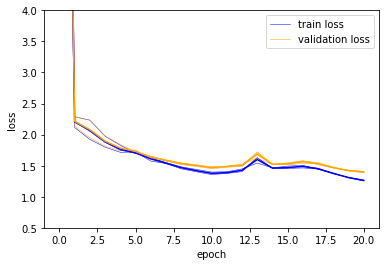

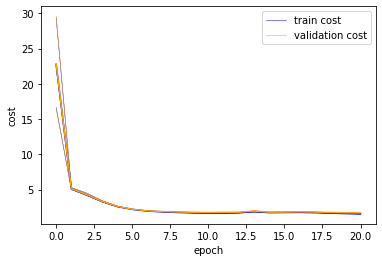

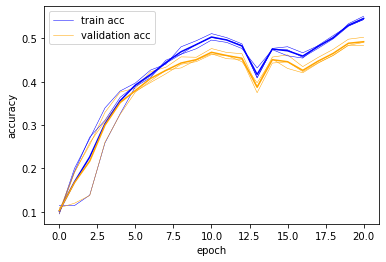

In [41]:
for i in range(3):
    plt.plot(avg_train_loss[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_loss[i],color='orange',linewidth=0.5)
train = np.array(avg_train_loss)
val = np.array(avg_val_loss)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.ylim((0.5,4))
plt.show()

for i in range(3):
    plt.plot(avg_train_cost[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_cost[i],color='orange',linewidth=0.5)
train = np.array(avg_train_cost)
val = np.array(avg_val_cost)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()

for i in range(3):
    plt.plot(avg_train_acc[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_acc[i],color='orange',linewidth=0.5)
train = np.array(avg_train_acc)
val = np.array(avg_val_acc)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train acc','validation acc'])
plt.show()

# get results for different inits 

with batchnorm


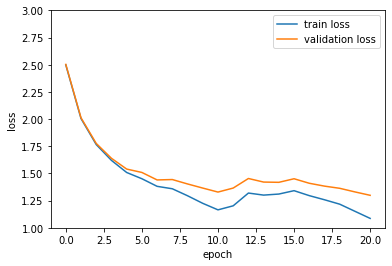

without batchnorm


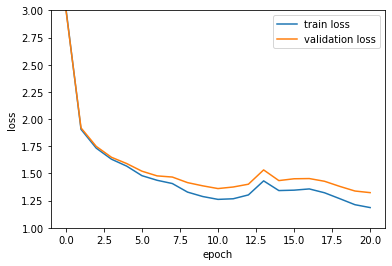

0.62389 & 0.5332 & 0.534
0.58718 & 0.5324 & 0.5379
with batchnorm


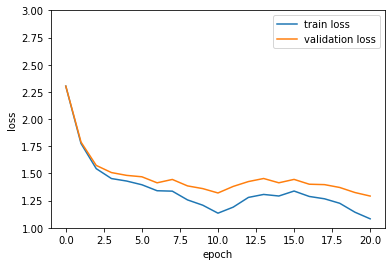

without batchnorm


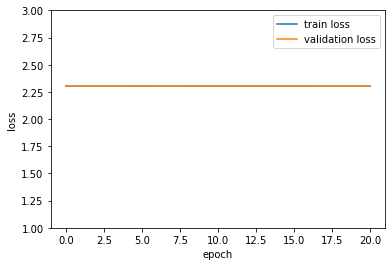

0.622 & 0.5384 & 0.5396
0.10113 & 0.0898 & 0.1
with batchnorm


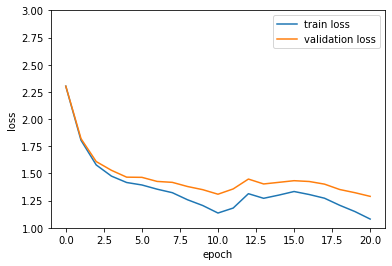

without batchnorm


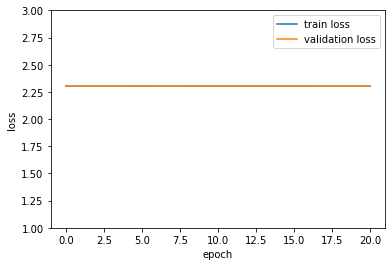

0.62218 & 0.533 & 0.5333
0.10113 & 0.0898 & 0.1


In [44]:

GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':2, 'freq':10,'seed':64,'lambda':5e-3}

for init in [1e-1,1e-3,1e-4]:
    layers, hist = m.load_network(GD_params,f'init_{init}_with_batchnorm',True)
    mlp = m.MLP(lambda_=5e-3)
    temp_layers = list()
    for layer in layers:
        temp_layers.append(layer)
    mlp.layers = temp_layers
    test_acc = mlp.ComputeAccuracy(data_45['X_test'],data_45['y_test'],True)
    train_loss = hist.item()['train_loss']
    train_cost = hist.item()['train_cost']
    val_loss = hist.item()['val_loss']
    val_cost = hist.item()['val_cost']
    train_acc = hist.item()['train_acc']
    val_acc = hist.item()['val_acc']

    layers2, hist2 = m.load_network(GD_params,f'init_{init}_without_batchnorm',True)
    mlp2 = m.MLP(lambda_=5e-3)
    temp_layers2 = list()
    for layer in layers2:
        temp_layers2.append(layer)
    mlp2.layers = temp_layers2
    test_acc2 = mlp2.ComputeAccuracy(data_45['X_test'],data_45['y_test'],False)
    train_loss2 = hist2.item()['train_loss']
    train_cost2 = hist2.item()['train_cost']
    val_loss2 = hist2.item()['val_loss']
    val_cost2 = hist2.item()['val_cost']
    train_acc2 = hist2.item()['train_acc']
    val_acc2 = hist2.item()['val_acc']

    print('with batchnorm')
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train loss','validation loss'])
    plt.ylim((1,3))
    plt.show()
    print('without batchnorm')
    plt.plot(train_loss2)
    plt.plot(val_loss2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train loss','validation loss'])
    plt.ylim((1,3))
    plt.show()
    print(f"{np.round(train_acc[-1],5)} & {np.round(val_acc[-1],5)} & {np.round(test_acc,5)}")
    print(f"{np.round(train_acc2[-1],5)} & {np.round(val_acc2[-1],5)} & {np.round(test_acc2,5)}")

# Results from $\lambda$ search

In [45]:
importlib.reload(m)
X_train_whole, y_train_whole, Y_train_whole = u.load_data('/data_batch_1', clipping=True)
for i in range(2,6):
    X, y, Y = u.load_data('/data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-1000:], y_train_whole[-1000:], Y_train_whole[:,-1000:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-1000], y_train_whole[:-1000], Y_train_whole[:,:-1000]

filename = '/test_batch'
X_test_45, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole -= np.outer(mean, np.ones(X_train_whole.shape[1]))
X_train_whole /= np.outer(std, np.ones(X_train_whole.shape[1]))

X_val_small -= np.outer(mean, np.ones(X_val_small.shape[1]))
X_val_small /= np.outer(std, np.ones(X_val_small.shape[1]))

X_test_45 -= np.outer(mean, np.ones(X_test_45.shape[1]))
X_test_45 /= np.outer(std, np.ones(X_test_45.shape[1]))


data_49 = {'X_train':X_train_whole, 'Y_train':Y_train_whole, 'y_train':y_train_whole,'X_val':X_val_small, 'Y_val':Y_val_small, 'y_val':y_val_small, 'X_test':X_test_45, 'Y_test':Y_test,'y_test':y_test}

In [49]:
import model as m 
importlib.reload(m)
ns = 5*49000/100
GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':4, 'freq':10,'seed':64,'lambda':0.00774}
dims = [3072,50,50,10]
layers, hist = m.load_network(GD_params,'best_lambda',True)
mlp = m.MLP(lambda_=0.00774)
temp_layers = list()
for layer in layers:
    temp_layers.append(layer)
mlp.layers = temp_layers
test_acc = mlp.ComputeAccuracy(data_49['X_test'],data_49['y_test'],True)
train_loss = hist.item()['train_loss']
train_cost = hist.item()['train_cost']
val_loss = hist.item()['val_loss']
val_cost = hist.item()['val_cost']
train_acc = hist.item()['train_acc']
val_acc = hist.item()['val_acc']

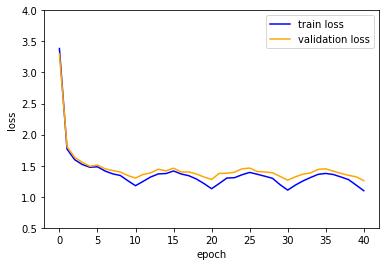

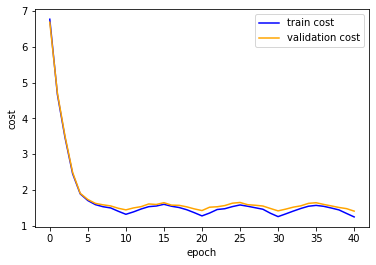

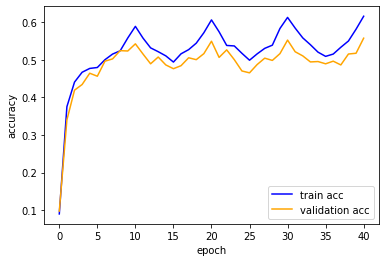

In [51]:
plt.plot(train_loss,color='blue')
plt.plot(val_loss,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.ylim((0.5,4))
plt.show()

plt.plot(train_cost,color='blue')
plt.plot(val_cost,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()


plt.plot(train_acc,color='blue')
plt.plot(val_acc,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train acc','validation acc'])
plt.show()